# Take Home Assignment 1
### Download any one of the text dataset mentioned in the previous lecture
Tom Sawyer Complete book in txt format

In [31]:
import re  
from operator import itemgetter    
import matplotlib.pyplot as plt
import numpy as np
freq=[]
zipflength=[]
zipffreq=[]
words=[]
frequency = {}
f = open('Tom_Sawyer_Complete.txt', 'r')
temp = f.read()
words = re.findall(r'(\b[A-Za-z][A-Za-z]{0,}\'?[A-Za-z]{0,}\b)', temp)

typenum=0
tokennum=0

for word in words:
    count = frequency.get(word,0)
    frequency[word] = count + 1
    tokennum=tokennum+1
    if(count==0):
        typenum=typenum+1
Rank={}
temp=1
for key, value in reversed(sorted(frequency.items(), key = itemgetter(1))):
    #print key, value
    Rank[key]=temp
    temp=temp+1
    zipflength.append(len(key))
    zipffreq.append(value)
    freq.append(value)

### Compute tokens, types, and TTR

In [9]:
TTR=float(typenum)/tokennum
print "TTR=",TTR,"\ntype=",typenum,"\ntoken=",tokennum

TTR= 0.111541004826 
type= 7928 
token= 71077


### Plot Zipf’s law
Zipf's Law Plot : A relationship between the frequency of a word (f) and its position in the list
(its rank r).

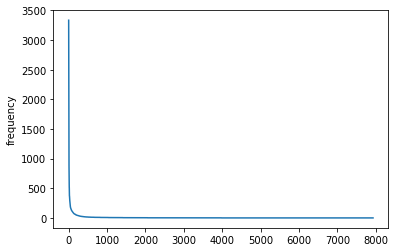

In [10]:
plt.plot(freq)
plt.ylabel('frequency')
plt.show()

# Check if Zipf’s law holds true for meanings and lengths.

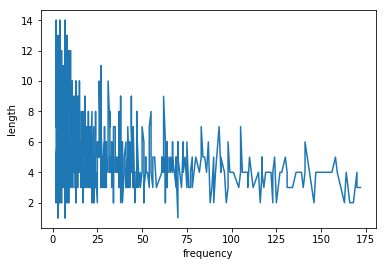

In [27]:
plt.plot(zipffreq[50:3000],zipflength[50:3000])
plt.ylabel('length')
plt.xlabel('frequency')
plt.show()

In [30]:
words

['PREFACE',
 'Most',
 'of',
 'the',
 'adventures',
 'recorded',
 'in',
 'this',
 'book',
 'really',
 'occurred',
 'one',
 'or',
 'two',
 'were',
 'experiences',
 'of',
 'my',
 'own',
 'the',
 'rest',
 'those',
 'of',
 'boys',
 'who',
 'were',
 'schoolmates',
 'of',
 'mine',
 'Huck',
 'Finn',
 'is',
 'drawn',
 'from',
 'life',
 'Tom',
 'Sawyer',
 'also',
 'but',
 'not',
 'from',
 'an',
 'individual',
 'he',
 'is',
 'a',
 'combination',
 'of',
 'the',
 'characteristics',
 'of',
 'three',
 'boys',
 'whom',
 'I',
 'knew',
 'and',
 'therefore',
 'belongs',
 'to',
 'the',
 'composite',
 'order',
 'of',
 'architecture',
 'The',
 'odd',
 'superstitions',
 'touched',
 'upon',
 'were',
 'all',
 'prevalent',
 'among',
 'children',
 'and',
 'slaves',
 'in',
 'the',
 'West',
 'at',
 'the',
 'period',
 'of',
 'this',
 'story',
 'that',
 'is',
 'to',
 'say',
 'thirty',
 'or',
 'forty',
 'years',
 'ago',
 'Although',
 'my',
 'book',
 'is',
 'intended',
 'mainly',
 'for',
 'the',
 'entertainment',
 'of

# Plot Heaps’ law. Fit a curve and report the estimated K and β values.
Plot 

In [12]:
corpusAsPara=['']
i=0
with open('Tom_Sawyer_Complete.txt') as inputfile:
    for line in inputfile:
        if(line=='\n'):
            i=i+1
            corpusAsPara.append('')
        else:
            corpusAsPara[i]+=line[0:-1]+' '
print len(corpusAsPara[15]), corpusAsPara[15]

11 No answer. 


In [13]:
heapVocab=[]
heaptoken=[]
frequency={}
tempVocab=0
temptoken=0
for i in range(len(corpusAsPara)):
    if(len(corpusAsPara[i])>80):
        words = re.findall(r'(\b[A-Za-z][A-Za-z]{0,}\'?[A-Za-z]{0,}\b)', corpusAsPara[i])
        for word in words:
            count = frequency.get(word,0)
            frequency[word] = count + 1
            temptoken=temptoken+1
            if(count==0):
                tempVocab=tempVocab+1
        heapVocab.append(tempVocab)
        heaptoken.append(temptoken)
        temptoken=0
        tempVocab=0
        frequency={}

### Curve Fitting can be done by taking log on both sides of the equation and then estimating the values based on the transformed equation
   ## V=KN^B
   ## logV=logK + B*logN

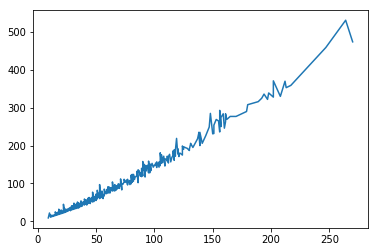

In [20]:
import itertools
lists = sorted(itertools.izip(*[heapVocab, heaptoken]))
new_x, new_y = list(itertools.izip(*lists))
plt.plot(new_x,new_y)
x=np.polyfit(np.log(heaptoken),np.log(heapVocab),1)

In [22]:
import math
print x
beta=x[1]
K=math.pow(10,x[0])

[0.84765825 0.37493872]


In [26]:
print "beta=",beta,"K=",K

beta= 0.37493871930522527 K= 7.0413875625
